# ASSIGNMENT 4 EE:240 PATTERN RECOGNITION AND MACHINE LEARNING
  *NAME: NITYASH GAUTAM*
  
  *SID: 862395403*

  *UCR Email: ngaut006@ucr.edu*


## ESSENTIAL IMPORTS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
sns.set()
from sklearn.datasets import make_blobs
from PIL import Image
import os
import cv2
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import random
import time

## H 4.1 K-means clustering: In this exercise we will perform color-based segmentation using K-means algorithm.

### (a) - (5 pts) 
Implement K-means algorithm in Python that accepts target number of clusters (K) and a color image as input parameters. Treat each color pixel as 3-dim. feature vector $x_i$.

A general K-means algorithm can be described as follows. Suppose we are given training examples $x_1, x_2, . . . , x_N$, where each $x_n ∈ \mathbb{R}^d$. We want to group the N data samples into K clusters.

* Initialize cluster centers $μ_1, . . . , μ_K ∈ \mathbb{R}^d$ at random.
* Repeat until convergence {

  * For every data point xi, update its label as

    $$l_i = argmin_j||x_i-μ_j||_2^2$$
  
  * For each cluster $j$, update its center $μ_j$ as mean of all points assigned to cluster $j$:

    $$μ_j = \frac{∑ _{i=1}δ(l_i = j)x_i}{∑ _{i=1}δ(l_i = j)}$$

  }

#### *Helper Functions*

In [ ]:
def plotData(data, labels, K, new_centroids):
    center = np.array(new_centroids)
    for x in range(K):
        points_for_label = data[labels == x]
        plt.scatter(points_for_label[:, 0], points_for_label[:, 1], points_for_label[:,2], c=center[x])
    
    plt.scatter(center[:, 0], center[:, 1], c = 'red', s=40, marker = '*')
    ax = plt.gca()
    ax.axis('equal')
    plt.show()

#### *Defining the K-means Algo*

In [ ]:
def kmeans_algo_euclidean(data, K, max_iter=100, tol = pow(10,-3), random_state = 42):
  random_generation = np.random.default_rng(seed=random_state)
  min_of_data = np.amin(data)
  max_of_data = np.amax(data)

  centroids = []

  for i in range(K):
      centroids.append([0.6]*data.shape[1])

  iter = 0

  for epoch in range(max_iter):
      iter = epoch

      # Calculating distance for the puspose of assigning clusters to data points
      labels = np.array([])
      for x in data:
          distance = np.array([])
          for j in centroids:
              distance = np.append(distance, np.linalg.norm(x - j,2))
          labels = np.append(labels, np.argmin(distance))

      # Updating the centroids
      new_centroids = []
      for x in range(K):
          points = data[labels == x]
          if len(points) > 0:
              new_centroids.append(np.mean(points,axis=0))
          else :
              new_centroids.append(centroids[x])

      if np.all(np.array(centroids) == np.array(new_centroids)):
          print('!'*10, 'COMPUTATIONS TERMINATED', '!'*10)
          print ('Cause of Termination => NO CHANGE IN CENTROIDS')
          print()
          break

      centroids = np.array(new_centroids)

      if iter == max_iter:
          print ('!'*10, 'MAX ITERATIONS REACHED | NO FURTHER EXECUTIONS', '!'*10)
          print()

  print ('*'*10, 'OUTPUT AFTER', iter, 'COMPUTATIONS', '*'*10)
  plotData(data, labels, K, new_centroids)


  # return labels, centroids, SSE_history, iter
  return labels, centroids, iter

### (b) - (10 pts)

Take a selfie of yourself with a background that has different colors from your skin and clothing.
Use K-means script from previous step to segment your image into K clusters. To create a
segmented output image, replace every pixel in your image with the center of the cluster assigned
to it. Report your results for K= {2, 4, 8, 16} clusters.

#### *Selecting the Selfie + Pre-Processing*

[360. 360.]


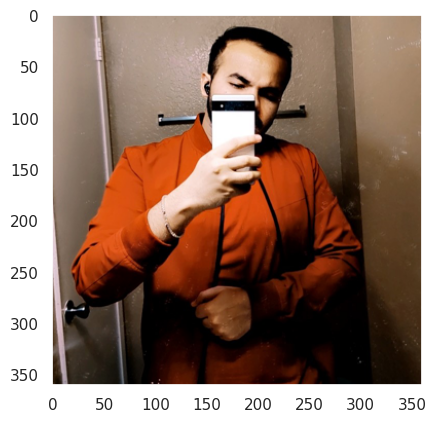

In [ ]:
img = Image.open('/content/drive/MyDrive/Spring 2023/EE 240 Pattern Recognition/Assignments/Datasets/ee240_selfie.jpg')
img_size = img.size
new_size = np.asarray(img_size)/2
print(new_size)
img = img.resize(new_size.astype(int))
img = np.asarray(img)
plt.imshow(img)
plt.grid(False)

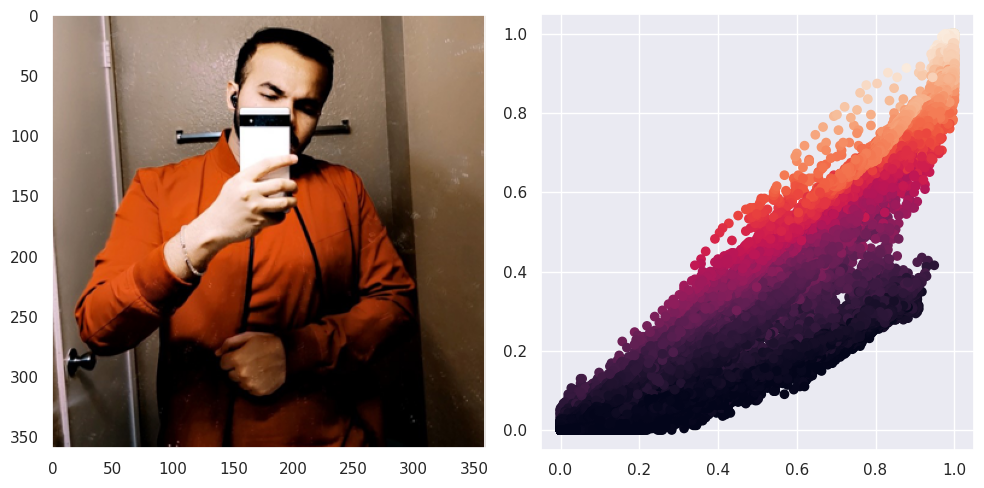

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

if np.max(img) > 1:
    img = np.array(img, dtype=np.float64) / 255
axes[0].imshow(img)
axes[0].grid(False)

# Load Image and transform to a 2D numpy array.
h, w, c = original_shape = tuple(img.shape)
assert c == 3
data = np.reshape(img, (w * h, c))

axes[1].scatter(data[:,0], data[:,1], c=data[:,2])
plt.tight_layout()
plt.show()


#### *Main Code (Applying K-Means with Eucledean Distance)*

<<<<<<<<<<<<<<<<<<<<<<<<< STARTED FOR K = 2 >>>>>>>>>>>>>>>>>>>>>>>>>

!!!!!!!!!! COMPUTATIONS TERMINATED !!!!!!!!!!
Cause of Termination => NO CHANGE IN CENTROIDS

********** OUTPUT AFTER 18 COMPUTATIONS **********


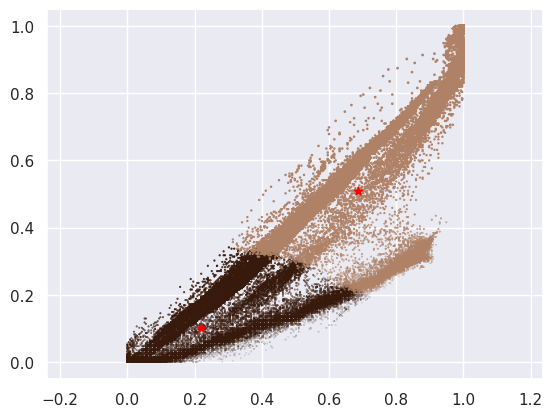

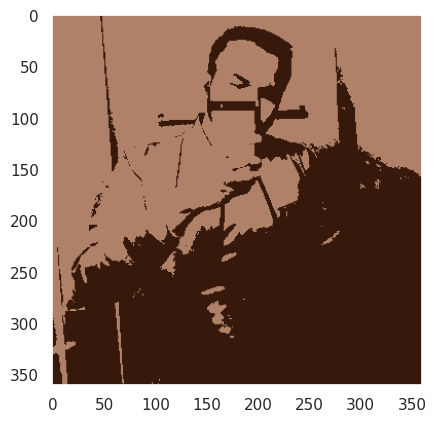

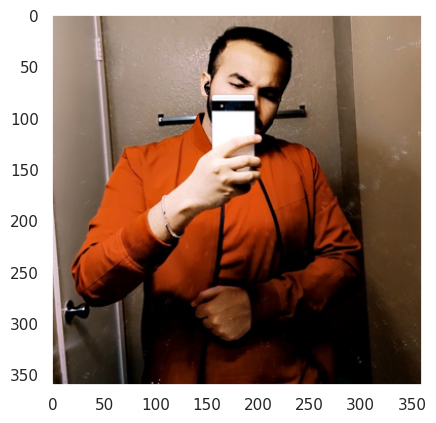


************************* ENDED FOR K = 2 *************************

<<<<<<<<<<<<<<<<<<<<<<<<< STARTED FOR K = 4 >>>>>>>>>>>>>>>>>>>>>>>>>

!!!!!!!!!! COMPUTATIONS TERMINATED !!!!!!!!!!
Cause of Termination => NO CHANGE IN CENTROIDS

********** OUTPUT AFTER 21 COMPUTATIONS **********


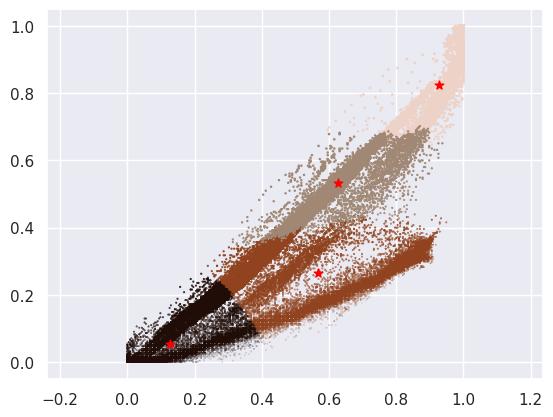

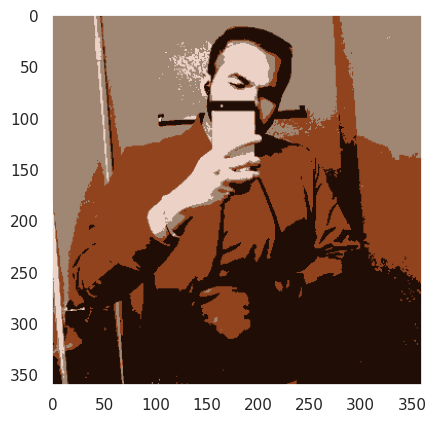

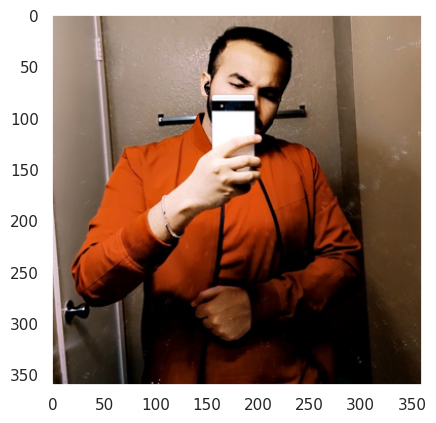


************************* ENDED FOR K = 4 *************************

<<<<<<<<<<<<<<<<<<<<<<<<< STARTED FOR K = 8 >>>>>>>>>>>>>>>>>>>>>>>>>

!!!!!!!!!! COMPUTATIONS TERMINATED !!!!!!!!!!
Cause of Termination => NO CHANGE IN CENTROIDS

********** OUTPUT AFTER 61 COMPUTATIONS **********


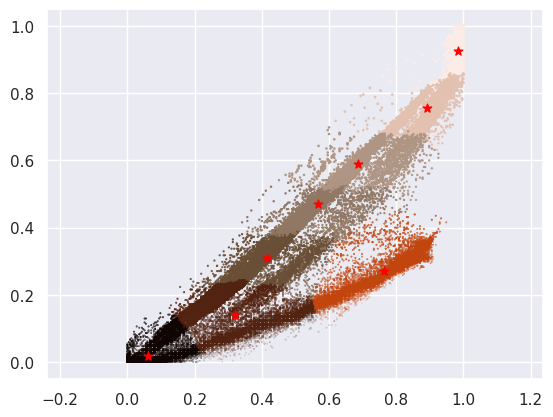

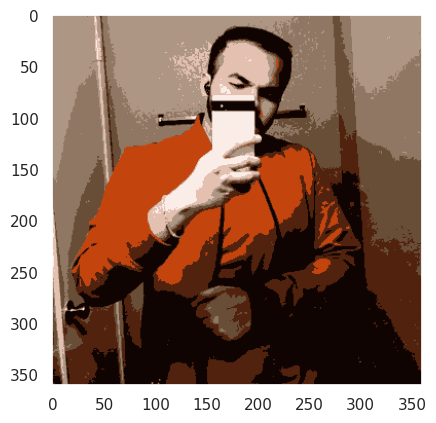

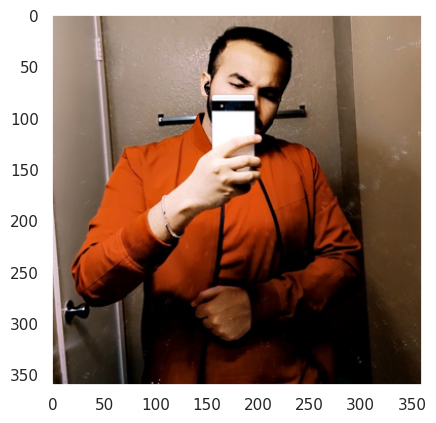


************************* ENDED FOR K = 8 *************************

<<<<<<<<<<<<<<<<<<<<<<<<< STARTED FOR K = 16 >>>>>>>>>>>>>>>>>>>>>>>>>

********** OUTPUT AFTER 99 COMPUTATIONS **********


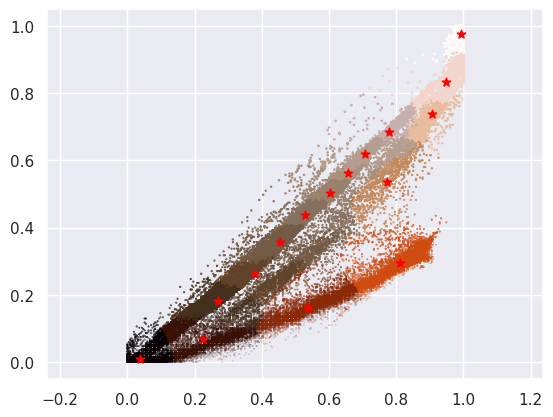

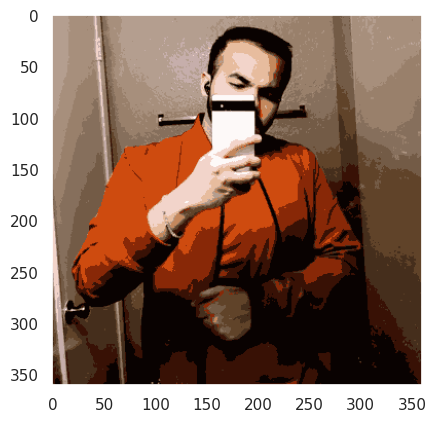

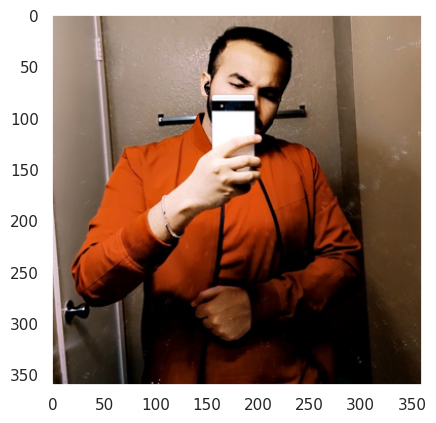


************************* ENDED FOR K = 16 *************************

CPU times: user 1h 7min 2s, sys: 17.1 s, total: 1h 7min 19s
Wall time: 1h 7min 39s


In [ ]:
%%time

for K in [2, 4, 8, 16]:
  print('<'*25, 'STARTED FOR K =', K, '>'*25)
  
  print()
  
  labels, centroids, iters = kmeans_algo_euclidean(data, K, max_iter = 100, tol = pow(10, -3))  
  
  print ()

  quantized_data = np.array([centroids[int(i)] for i in labels])
  quantized_image = np.reshape(quantized_data, (w ,h, c))
  plt.figure(1)
  plt.imshow(quantized_image)
  plt.grid(False)

  plt.figure(2)
  plt.imshow(img)
  plt.grid(False)
  plt.show()

  print()
  print('*'*25, 'ENDED FOR K =', K, '*'*25)
  print()

### (c) - (10 pts)

Repeat steps (a) and (b) with absolute distance instead of squared euclidean distance. That is, implement a new script that replaces minimum euclidean distance in (1) with minimum absolute distance1 $l_i = arg min_j||x_i − μ_j||_1$. Report your results for K={2, 4, 8, 16} clusters for selfie segmentation/color quantization using the new distance.

#### *K-Means Algorithm with Absolute Distance*

In [ ]:
def kmeans_algo_absolute(data, K, max_iter=100, tol = pow(10,-3), random_state = 42):
  random_generation = np.random.default_rng(seed=random_state)
  min_of_data = np.amin(data)
  max_of_data = np.amax(data)

  centroids = []

  for i in range(K):
      centroids.append([0.6]*data.shape[1])

  iter = 0

  for epoch in range(max_iter):
      iter = epoch

      # Calculating distance for the puspose of assigning clusters to data points
      labels = np.array([])
      for x in data:
          distance = np.array([])
          for j in centroids:
              distance = np.append(distance, np.linalg.norm(x - j,1))
          labels = np.append(labels, np.argmin(distance))

      # Updating the centroids
      new_centroids = []
      for x in range(K):
          points = data[labels == x]
          if len(points) > 0:
              new_centroids.append(np.mean(points,axis=0))
          else :
              new_centroids.append(centroids[x])

      if np.all(np.array(centroids) == np.array(new_centroids)):
          print('!'*10, 'COMPUTATIONS TERMINATED', '!'*10)
          print ('Termination Cause => NO CHANGE IN CENTROIDS')
          print()
          break

      centroids = np.array(new_centroids)

      if iter == max_iter:
          print ('!'*10, 'MAX ITERATIONS REACHED | NO FURTHER EXECUTIONS', '!'*10)
          print()


  print ('*'*10, 'OUTPUT AFTER', iter, 'COMPUTATIONS', '*'*10)
  plotData(data, labels, K, new_centroids)


  # return labels, centroids, SSE_history, iter
  return labels, centroids, iter

#### *Implementing the K-Means Algorithm with Absolute Distance*

<<<<<<<<<<<<<<<<<<<<<<<<< STARTED FOR K = 2 >>>>>>>>>>>>>>>>>>>>>>>>>

!!!!!!!!!! COMPUTATIONS TERMINATED !!!!!!!!!!
Termination Cause => NO CHANGE IN CENTROIDS

********** OUTPUT AFTER 7 COMPUTATIONS **********


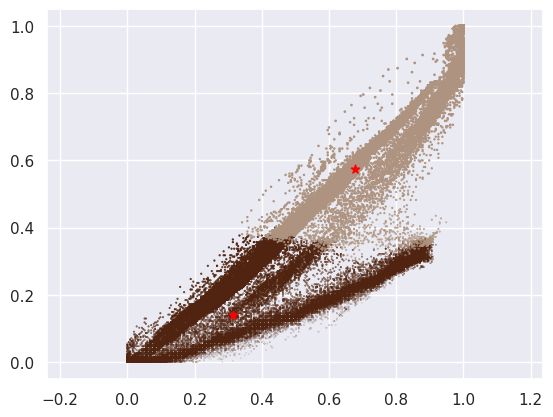

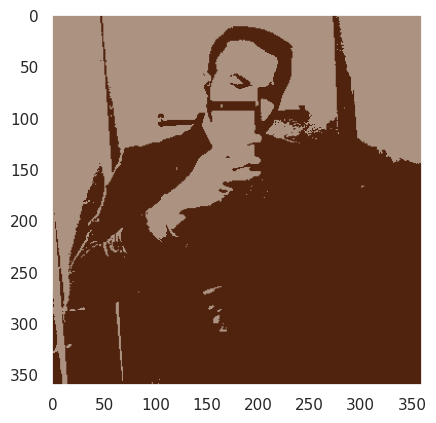

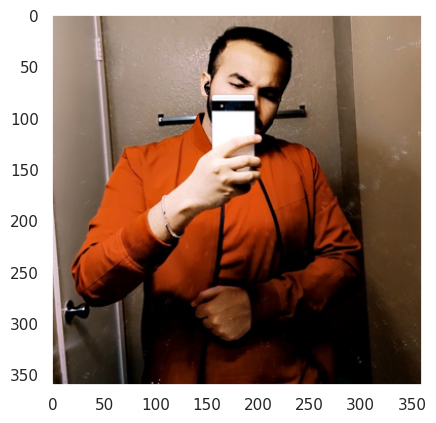


************************* ENDED FOR K = 2 *************************

<<<<<<<<<<<<<<<<<<<<<<<<< STARTED FOR K = 4 >>>>>>>>>>>>>>>>>>>>>>>>>

!!!!!!!!!! COMPUTATIONS TERMINATED !!!!!!!!!!
Termination Cause => NO CHANGE IN CENTROIDS

********** OUTPUT AFTER 14 COMPUTATIONS **********


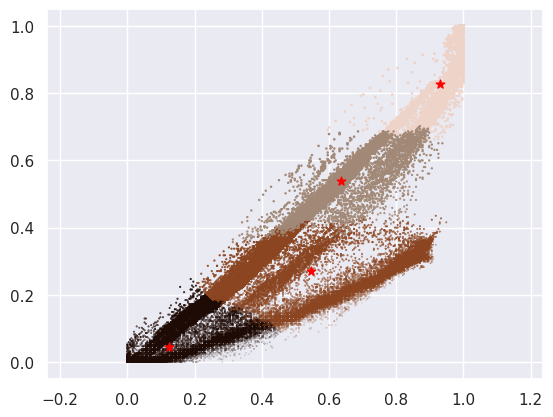

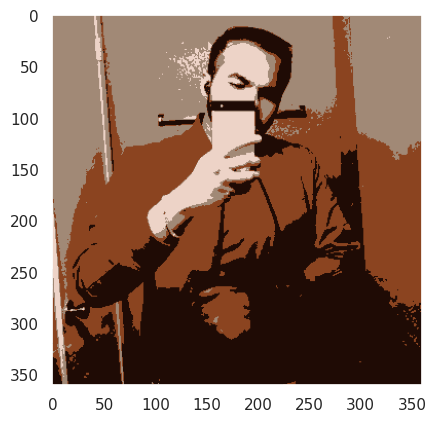

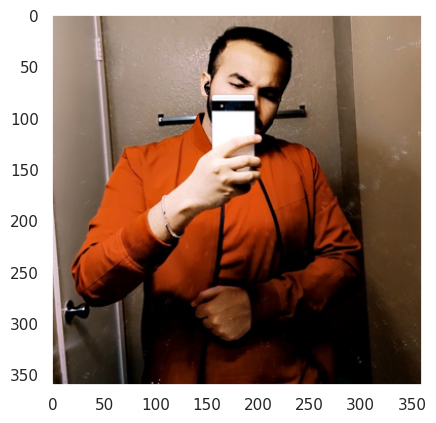


************************* ENDED FOR K = 4 *************************

<<<<<<<<<<<<<<<<<<<<<<<<< STARTED FOR K = 8 >>>>>>>>>>>>>>>>>>>>>>>>>

!!!!!!!!!! COMPUTATIONS TERMINATED !!!!!!!!!!
Termination Cause => NO CHANGE IN CENTROIDS

********** OUTPUT AFTER 46 COMPUTATIONS **********


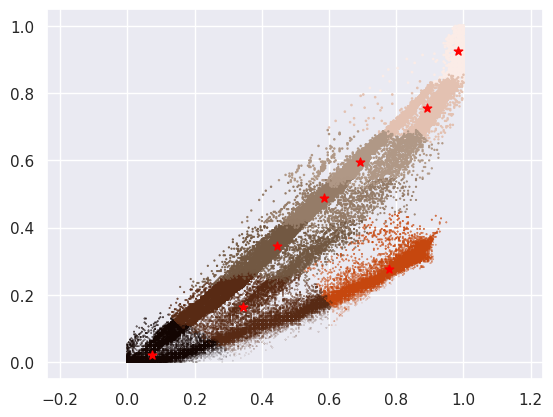

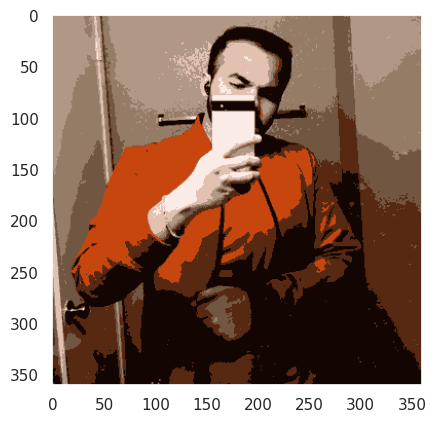

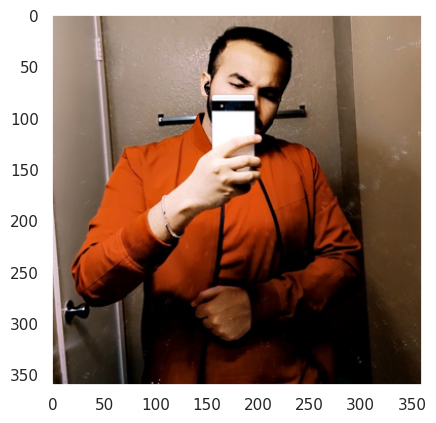


************************* ENDED FOR K = 8 *************************

<<<<<<<<<<<<<<<<<<<<<<<<< STARTED FOR K = 16 >>>>>>>>>>>>>>>>>>>>>>>>>

********** OUTPUT AFTER 99 COMPUTATIONS **********


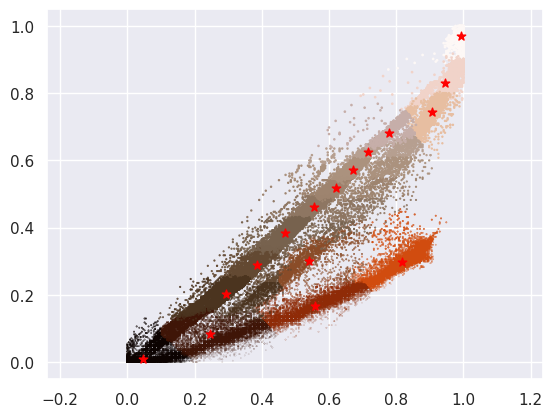

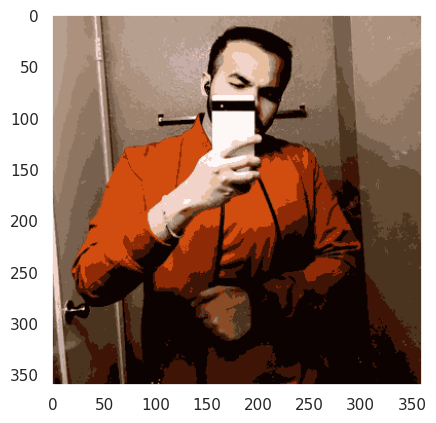

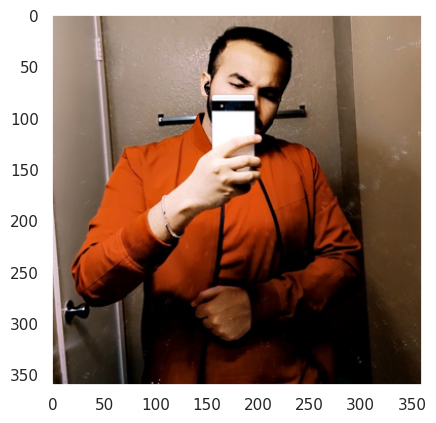


************************* ENDED FOR K = 16 *************************

CPU times: user 1h 1min 25s, sys: 19.2 s, total: 1h 1min 44s
Wall time: 1h 1min 57s


In [ ]:
%%time

for K in [2, 4, 8, 16]:
  print('<'*25, 'STARTED FOR K =', K, '>'*25)

  print()

  labels, centroids, iters = kmeans_algo_absolute(data, K, max_iter = 100, tol = pow(10, -3))  
  
  print ()

  quantized_data = np.array([centroids[int(i)] for i in labels])
  quantized_image = np.reshape(quantized_data, (w ,h, c))
  plt.figure(1)
  plt.imshow(quantized_image)
  plt.grid(False)

  plt.figure(2)
  plt.imshow(img)
  plt.grid(False)
  plt.show()

  print()
  print('*'*25, 'ENDED FOR K =', K, '*'*25)
  print()

## H 4.2 Principal component analysis (PCA): 

In this problem we will consider two tasks. First, we will explore the efficiency of PCA as a tool for dimensionality reduction and compression. Then, we will utilize PCA for constructing a rudimentary face recognition algorithm. Download ATT Face dataset from Piazza. ATT Face dataset contains images of the faces of 40 individuals. For each individual, there are 10 images taken under different poses. Divide your data into two sets: select 60% of images for training and remaining 40% for testing.

*You can read about eignefaces at this link: http://www.scholarpedia.org/article/Eigenfaces.*

You are allowed to use the PCA module in sklearn:

*from sklearn.decomposition import PCA*

### (a) - (10 pts)

Perform PCA on the training images viewed as points in high-dimensional space (using their
pixel values). Plot a curve displaying the amount of “energy” captured by the first k principal
components, where energy is the cumulative sum of top-k components variances, divided by the
sum of all the variances. How many components do we need in order to capture 50% of the
energy? How much of the energy is captured with k = 25?

#### *Importing, Visualizing, and Splitting Dataset!*

In [ ]:
dataset_path = '/content/drive/MyDrive/Spring 2023/EE 240 Pattern Recognition/Assignments/Datasets/att_faces/att_faces'

In [ ]:
dir_list = os.listdir(dataset_path)
dir_list.sort()

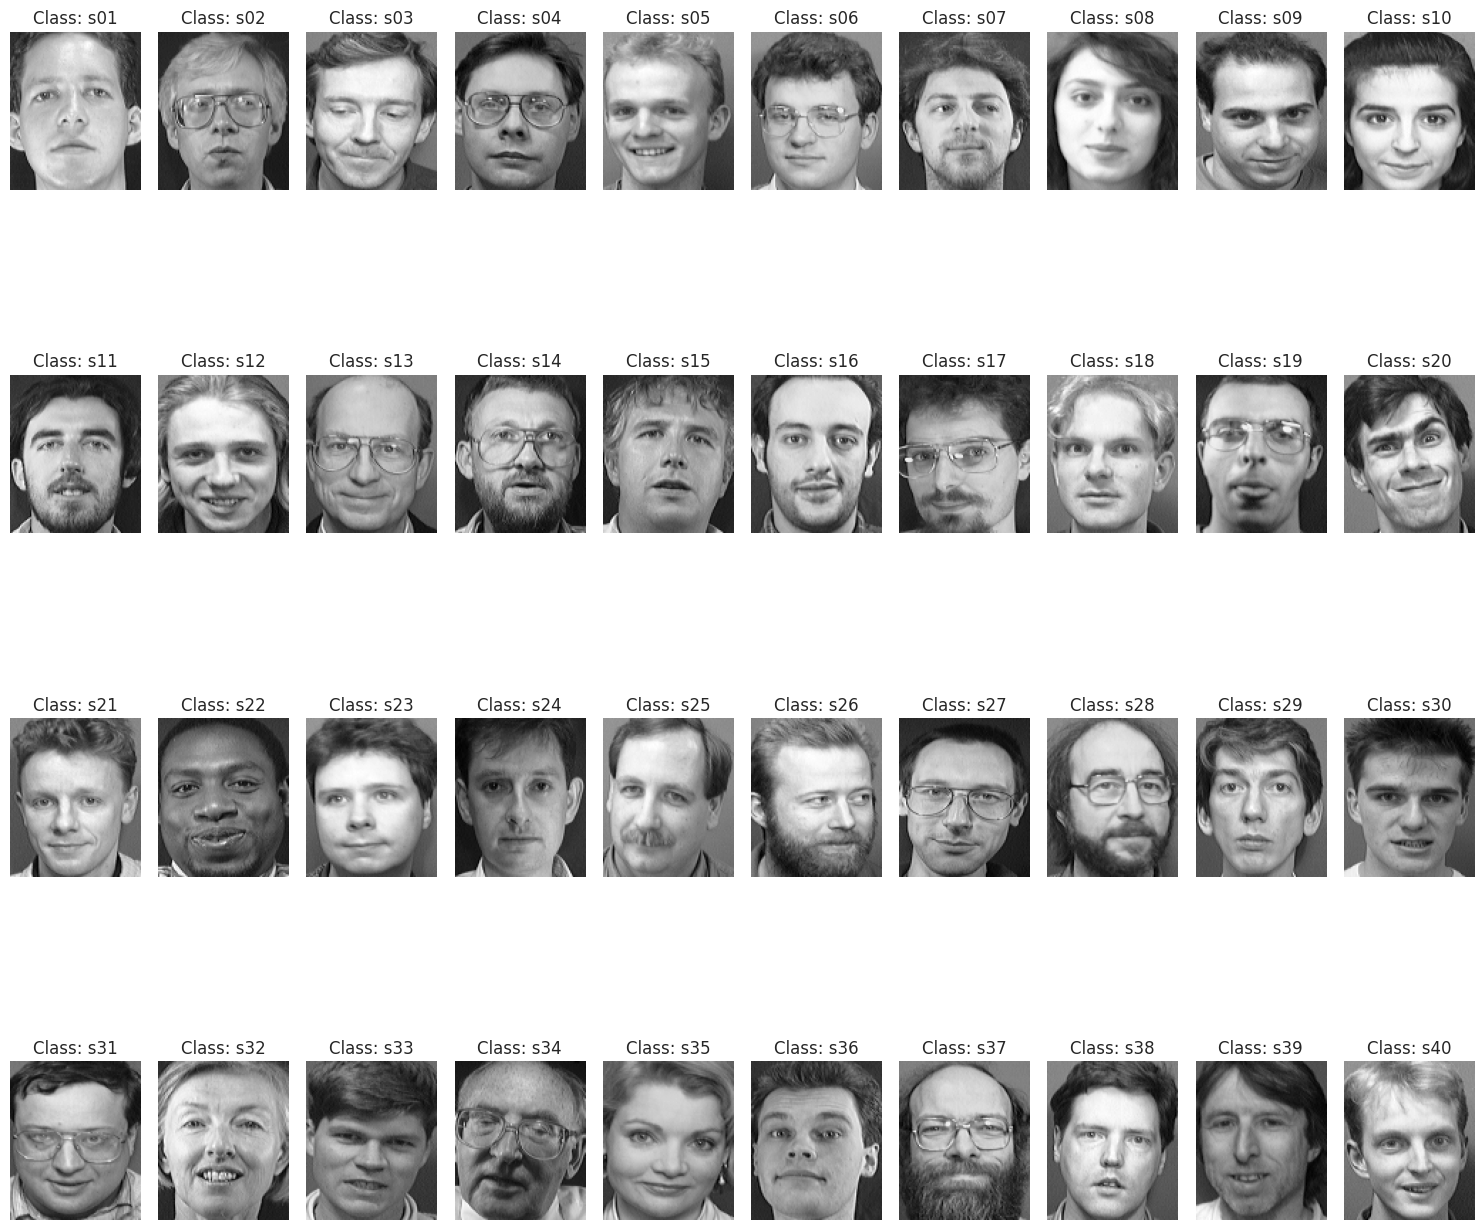

In [ ]:
fig, axs = plt.subplots(4, 10, figsize=(15, 15))

for i, dir_name in enumerate(dir_list):

    file_list = os.listdir(os.path.join(dataset_path, dir_name))    
    file_name = file_list[0]
    
    file_path = os.path.join(dataset_path, dir_name, file_name)
    
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    grid_pos = divmod(i, 10)
    
    axs[grid_pos].imshow(image, cmap='gray')
    axs[grid_pos].set_title(f'Class: {dir_name}')
    axs[grid_pos].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Function to Load the Dataset
def load_dataset(dataset_path):
    # Defining lists to store the images and their labels
    images = []
    labels = []
    
    # Fetching and sorting the directories
    dir_list = os.listdir(dataset_path)
    dir_list.sort()
    
    for dir_name in dir_list:
        file_list = os.listdir(os.path.join(dataset_path, dir_name))
        
        for file_name in file_list:
            file_path = os.path.join(dataset_path, dir_name, file_name)
            
            # Loading the image using OpenCV
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            
            # Flattening the image
            image = image.flatten()
            
            # Add the image and its label to the lists
            images.append(image)
            labels.append(dir_name)
    
    # Converting the lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)
    
    return images, labels

In [ ]:
%%time

X, y = load_dataset(dataset_path)
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (400, 10304)
Shape of y: (400,)
CPU times: user 336 ms, sys: 156 ms, total: 492 ms
Wall time: 1min 27s


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (240, 10304)
Shape of y_train: (240,)
Shape of X_test: (160, 10304)
Shape of y_test: (160,)


#### *Main Code*

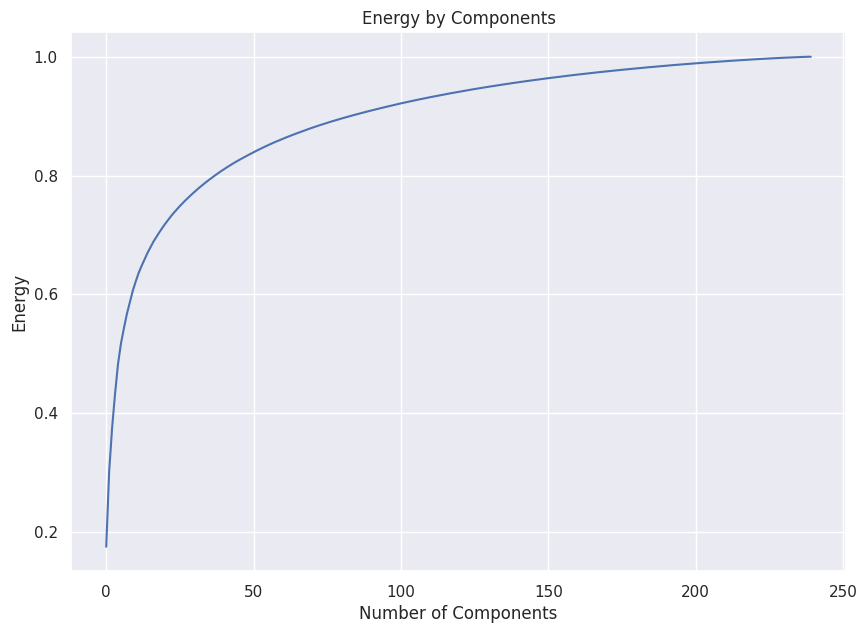


CPU times: user 945 ms, sys: 407 ms, total: 1.35 s
Wall time: 1.68 s


In [19]:
%%time

# Performing PCA
pca = PCA()
pca.fit(X_train)

# Cumulative sum of the explained variance ratio
energy_components = np.cumsum(pca.explained_variance_ratio_)

# Plot the curve displaying the amount of "energy" captured by the first k principal components
plt.figure(figsize=(10, 7))
plt.plot(energy_components)
plt.xlabel('Number of Components')
plt.ylabel('Energy')
plt.title('Energy by Components')
plt.grid(True)
plt.show()

print()

In [21]:
energy_at_25 = energy_components[24]
print('AT k=25, ENERGY CAPTURED =', energy_at_25)

print()

num_components_50 = np.where(energy_components >= 0.5)[0][0]
print('IN ORDER TO CAPTURE 50% OF THE ENERGY, WE NEED', num_components_50 + 1, 'COMPONENTS')

AT k=25, ENERGY CAPTURED = 0.743235798517751

IN ORDER TO CAPTURE 50% OF THE ENERGY, WE NEED 6 COMPONENTS


### (b) - (5 pts)

Visualize the previously discovered top 25 eigenfaces (eigenvectors obtained from PCA). Order
them according to the magnitudes of their corresponding eigenvalues and plot them in a single
figure.

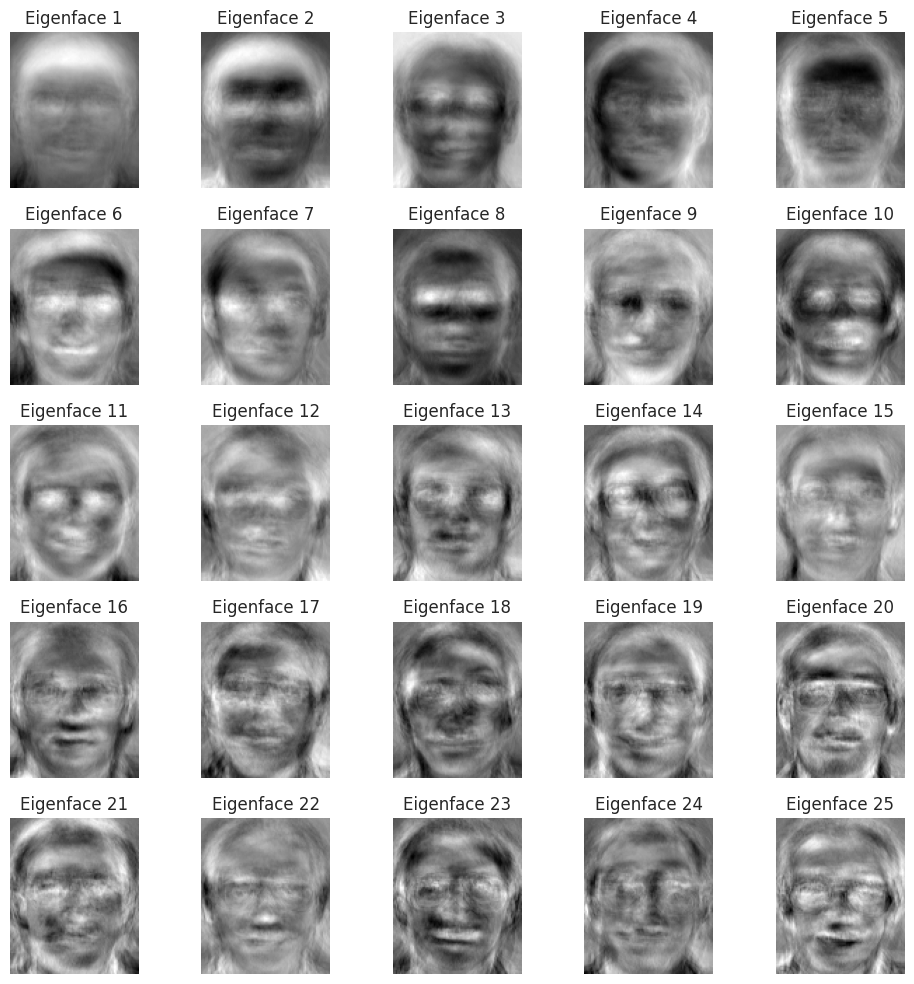

In [ ]:
# Running PCA model on the training data and keep the first 25 components
pca_25 = PCA(n_components=25)
pca_25.fit(X_train)

image_shape = cv2.imread(os.path.join(dataset_path, dir_list[0], os.listdir(os.path.join(dataset_path, dir_list[0]))[0]), cv2.IMREAD_GRAYSCALE).shape

# Plot the top 25 eigenfaces
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca_25.components_[i].reshape(image_shape), cmap='gray')
    ax.set_title(f'Eigenface {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

### (c) - (10 pts)

Let us now try to recognize the identity of a person’s face in a previously unseen image. Load
an image from the test set, subtract from it the mean of the training images and project it to
the previously computed top-25 principal components. Then, use a nearest neighbor search
to find its closest image in the training set. If the nearest neighbor found depicts the face of
the same person as the one of the unseen image, consider this as a successful discovery of the
person’s identity. Repeat this experiment for all the test images and report the mean accuracy
on the entire test data set. Make comments on the test images that are mistakenly identified.

#### *Helper Functions*

In [ ]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [ ]:
def absolute_distance(a, b):
    return np.sum(np.abs(a - b))

#### *Main Code*

!!!!!!!!!! KNN with EUCLIDEAN DISTANCE !!!!!!!!!!

MEAN ACCURACY ON THE TEST SET USING EUCLIDEAN DISTANCE: 94.375 %

Misclassified Images:



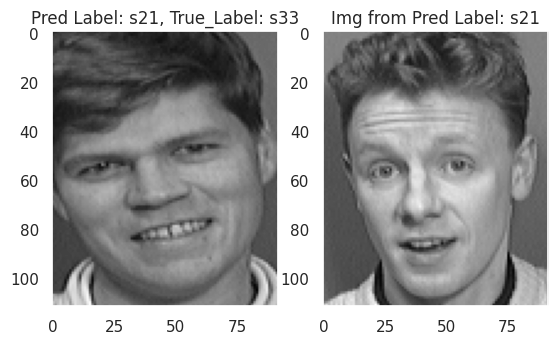

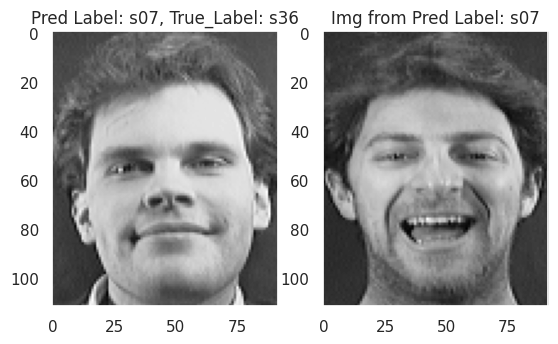

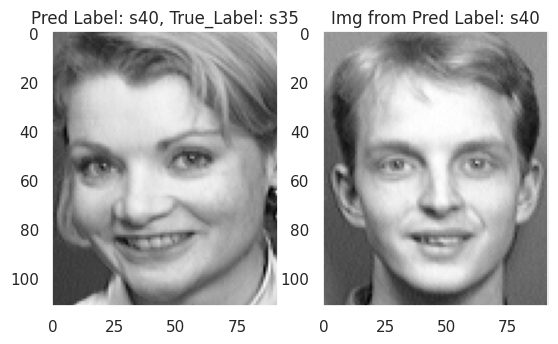

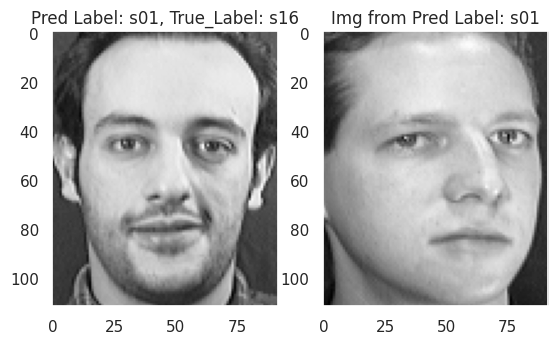

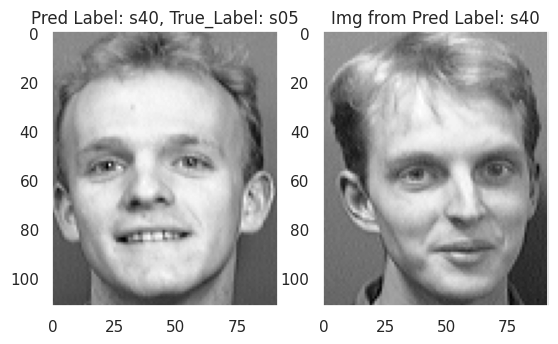

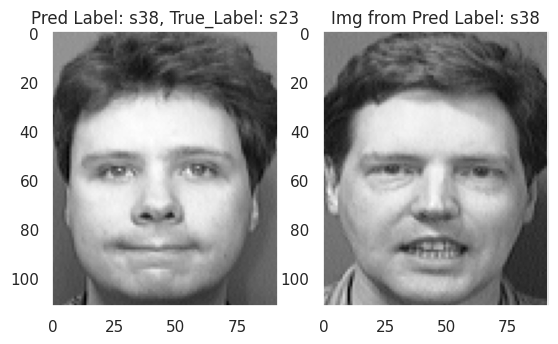

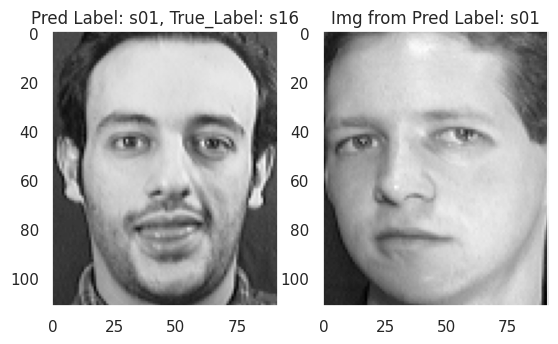

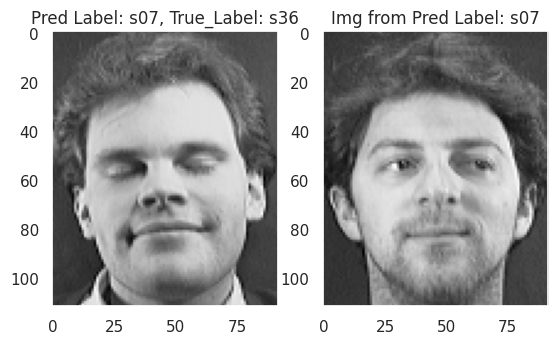

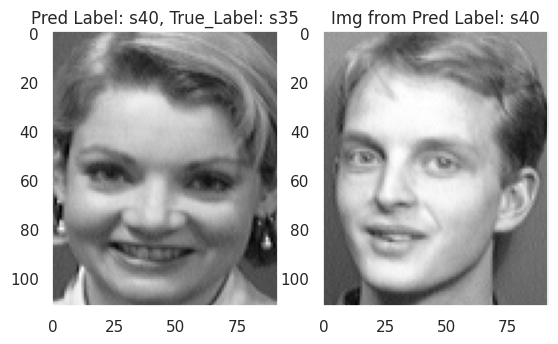

In [ ]:
print('!'*10, 'KNN with EUCLIDEAN DISTANCE', '!'*10)

print()

X_test_centered = X_test - pca_25.mean_ # centering the testset by the pca model mean

X_test_pca = pca_25.transform(X_test_centered) # pca transfomation on the centered testset

X_train_pca = pca_25.transform(X_train - pca_25.mean_) # pca transformation on the centered trainset

y_pred = np.empty(len(X_test), dtype=y_train.dtype)

misclassified_indices = []  # Store the indices of misclassified test images

# Create an empty array to store the predicted labels for the test set
y_pred = np.empty(len(X_test), dtype=y_train.dtype)

for i, test_image in enumerate(X_test_pca):
    # Compute Euclidean distances
    distances = np.array([euclidean_distance(test_image, train_image) for train_image in X_train_pca])
    
    closest_index = np.argmin(distances) # idx of the training image with the smallest distance (closest image)
    
    closest_label = y_train[closest_index] # Label of the closest Image
    
    y_pred[i] = closest_label

    if closest_label != y_test[i]:
        misclassified_indices.append(i)  # Add the index of misclassified test image

accuracy_eucl = np.mean(y_pred == y_test)

print('MEAN ACCURACY ON THE TEST SET USING EUCLIDEAN DISTANCE:', accuracy_eucl*100, '%')
print()

# Print the misclassified test images with predicted and true labels, along with a random image from the predicted label
print('Misclassified Images:')
print()
for misclassified_index in misclassified_indices:
    misclassified_image = X_test[misclassified_index].reshape((112, 92))
    predicted_label = y_pred[misclassified_index]
    
    # Find a random image index with the predicted label
    random_image_index = random.choice(np.where(y_train == predicted_label)[0])
    random_image = X_train[random_image_index].reshape((112, 92))
    
    # Display the misclassified image
    plt.subplot(1, 2, 1)
    plt.imshow(misclassified_image, cmap='gray')
    plt.grid(False)
    plt.title(f'Pred Label: {predicted_label}, True_Label: {y_test[misclassified_index]}')
    
    # Display the random image from the predicted label
    plt.subplot(1, 2, 2)
    plt.imshow(random_image, cmap='gray')
    plt.grid(False)
    plt.title(f'Img from Pred Label: {predicted_label}')
    
    plt.show()

!!!!!!!!!! KNN with ABSOLUTE (MANHATTAN) DISTANCE !!!!!!!!!!

MEAN ACCURACY ON THE TEST SET USING ABSOLUTE (MANHATTAN) DISTANCE: 96.25 %

Misclassified Images:



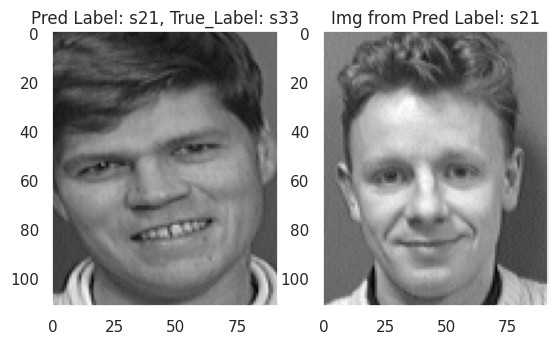

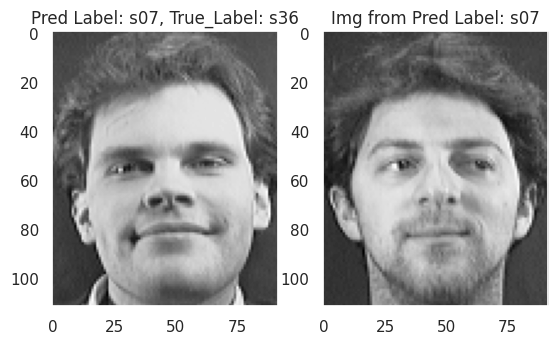

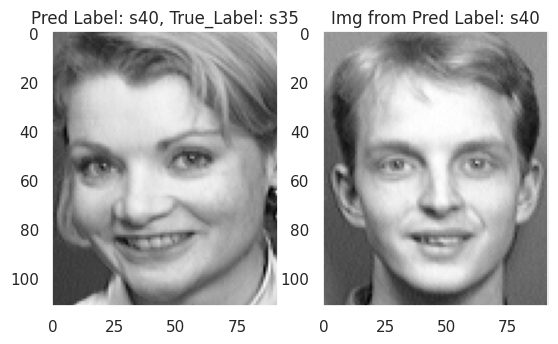

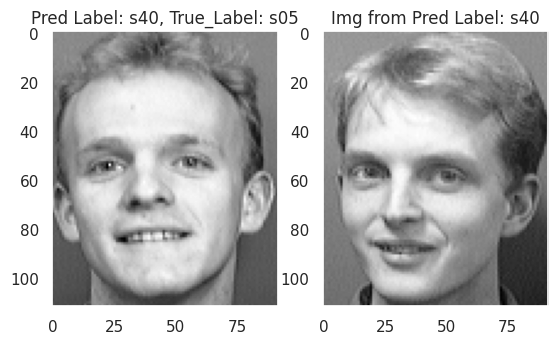

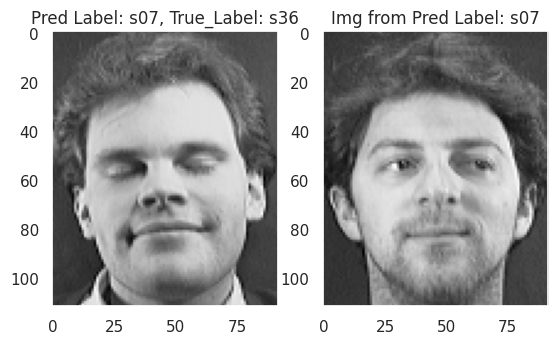

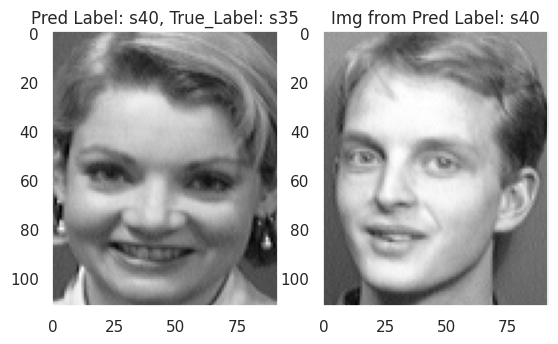

In [ ]:
print('!'*10, 'KNN with ABSOLUTE (MANHATTAN) DISTANCE', '!'*10)

print()

X_test_centered = X_test - pca_25.mean_ # centering the testset by the pca model mean

X_test_pca = pca_25.transform(X_test_centered) # pca transfomation on the centered testset

X_train_pca = pca_25.transform(X_train - pca_25.mean_) # pca transformation on the centered trainset

y_pred = np.empty(len(X_test), dtype=y_train.dtype)

misclassified_indices = []  # Store the indices of misclassified test images

# Create an empty array to store the predicted labels for the test set
y_pred = np.empty(len(X_test), dtype=y_train.dtype)

for i, test_image in enumerate(X_test_pca):
    # Compute Euclidean distances
    distances = np.array([absolute_distance(test_image, train_image) for train_image in X_train_pca])
    
    closest_index = np.argmin(distances) # idx of the training image with the smallest distance (closest image)
    
    closest_label = y_train[closest_index] # Label of the closest Image
    
    y_pred[i] = closest_label

    if closest_label != y_test[i]:
        misclassified_indices.append(i)  # Add the index of misclassified test image

accuracy_eucl = np.mean(y_pred == y_test)

print('MEAN ACCURACY ON THE TEST SET USING ABSOLUTE (MANHATTAN) DISTANCE:', accuracy_eucl*100, '%')
print()

# Print the misclassified test images with predicted and true labels, along with a random image from the predicted label
print('Misclassified Images:')
print()
for misclassified_index in misclassified_indices:
    misclassified_image = X_test[misclassified_index].reshape((112, 92))
    predicted_label = y_pred[misclassified_index]
    
    # Find a random image index with the predicted label
    random_image_index = random.choice(np.where(y_train == predicted_label)[0])
    random_image = X_train[random_image_index].reshape((112, 92))
    
    # Display the misclassified image
    plt.subplot(1, 2, 1)
    plt.imshow(misclassified_image, cmap='gray')
    plt.grid(False)
    plt.title(f'Pred Label: {predicted_label}, True_Label: {y_test[misclassified_index]}')
    
    # Display the random image from the predicted label
    plt.subplot(1, 2, 2)
    plt.imshow(random_image, cmap='gray')
    plt.grid(False)
    plt.title(f'Img from Pred Label: {predicted_label}')
    
    plt.show()

# SUBMISSION

In [ ]:
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:8 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,773 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:11 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,351 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:13 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:14

In [ ]:
!jupyter nbconvert --log-level CRITICAL --to pdf Nitaysh_Gautam_Homework_4.ipynb # make sure the ipynb name is correct